In [15]:
import random

def flip(numFlips):
    heads = 0
    for i in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    return mean

flipSim(1000, 10)

0.4989

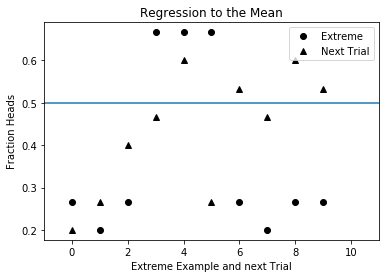

In [30]:
import pylab
# 平均への回帰の検証
def regressToMean(numFlips, numTrials):
    fracHeads = []
    for t in range(numTrials):
        fracHeads.append(flip(numFlips))
    extremes, nextTrials = [], []
    for i in range(len(fracHeads) -1):
        if fracHeads[i] < 0.33 or fracHeads[i] > 0.66:
            extremes.append(fracHeads[i])
            nextTrials.append(fracHeads[i+1])
    pylab.clf()
    pylab.plot(range(len(extremes)), extremes, 'ko', label = 'Extreme')
    pylab.plot(range(len(nextTrials)), nextTrials, 'k^', label = 'Next Trial')
    pylab.axhline(0.5)
    pylab.xlim(-1, len(extremes) + 1) # 最初と最後の結果が枠と重ならないよう-1〜len + 1の範囲としている
    pylab.xlabel('Extreme Example and next Trial')
    pylab.ylabel('Fraction Heads')
    pylab.title('Regression to the Mean')
    pylab.legend(loc = 'best')
    pylab.show()
    
regressToMean(15, 40)

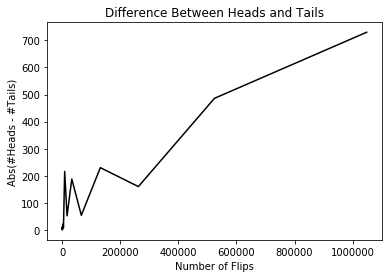

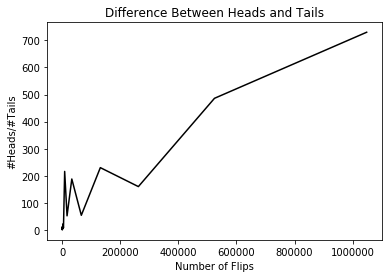

In [57]:
def flipPlot(minExp, maxExp):
    ratios, diffs, xAxis = [], [], []
    for exp in range(minExp, maxExp+1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H', 'T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        except ZeroDivisionError:
            continue
    # diff
    pylab.clf()
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'k')
    pylab.show()
    
    # ratio
    pylab.clf()
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, diffs, 'k')
    pylab.show()

random.seed(0)
flipPlot(4, 20)

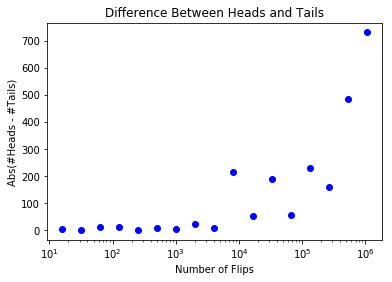

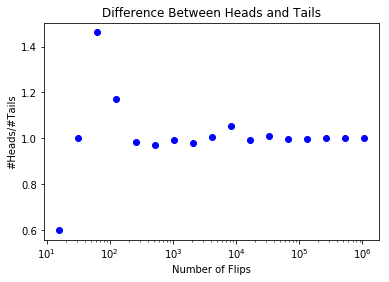

In [55]:
# グラフを対数表示にする
def flipPlot(minExp, maxExp):
    ratios, diffs, xAxis = [], [], []
    for exp in range(minExp, maxExp+1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H', 'T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        except ZeroDivisionError:
            continue
    # diff
    pylab.clf()
    pylab.xscale('log')
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'bo')
    pylab.show()
    
    # ratio
    pylab.clf()
    pylab.xscale('log')
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, 'bo')
    pylab.show()

random.seed(0)
flipPlot(4, 20)

In [63]:
def variance(X):
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return tot/len(X)

def stdDev(X):
    return variance(X)**0.5

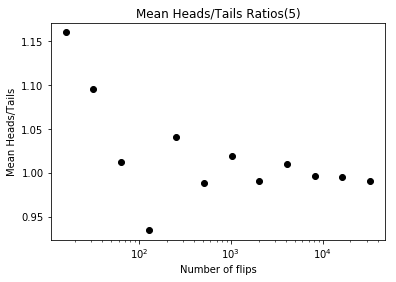

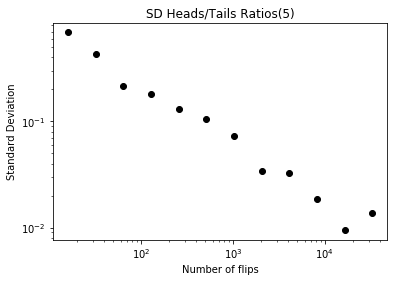

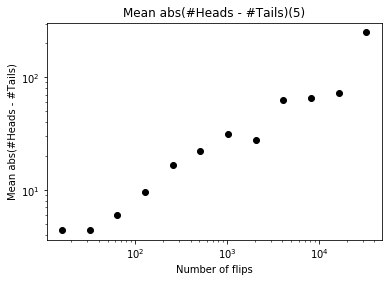

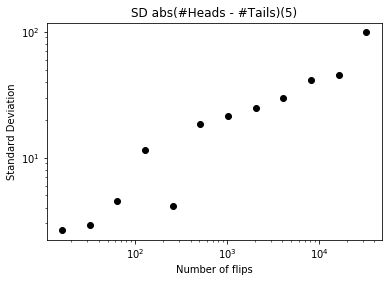

In [91]:
def makePlot(xVals, yVals, title, xLabel, yLabel, style, \
            logX = False, logY = False):
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()
    pylab.show()
    
def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            numHeads += 1
    numTails = numFlips - numHeads
    return (numHeads, numTails)

def flipPlot1(minExp, maxExp, numTrials):
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [], []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    numTrialsString = '(' + str(numTrials) + ')'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips',\
            'Mean Heads/Tails', 'ko', logX = True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of flips',\
            'Standard Deviation', 'ko', logX = True, logY = True)
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsMeans, title, 'Number of flips',\
            'Mean abs(#Heads - #Tails)', 'ko', logX = True, logY = True)
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title, 'Number of flips',\
            'Standard Deviation', 'ko', logX = True, logY = True)

flipPlot1(4, 15, 5)

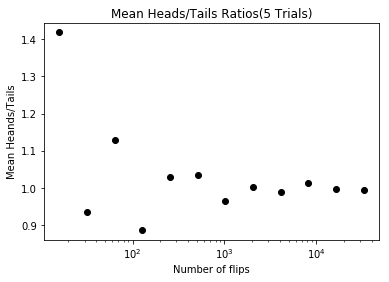

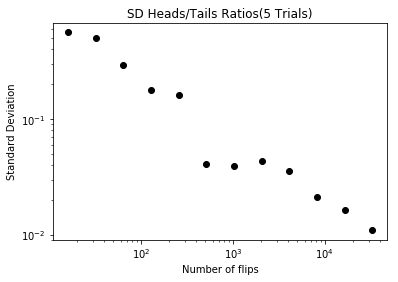

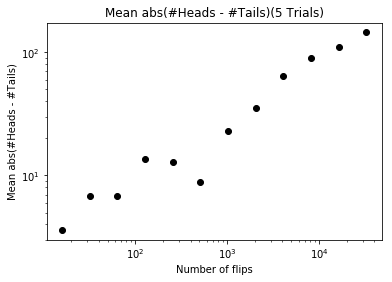

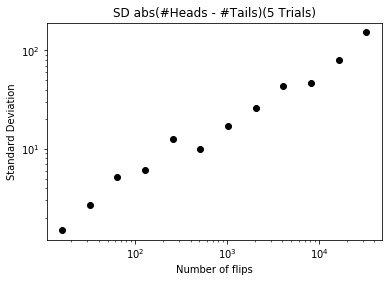

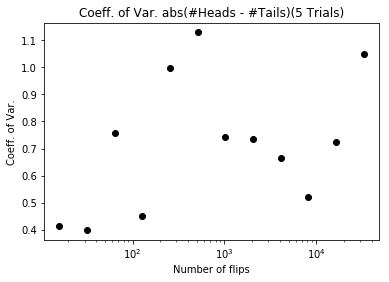

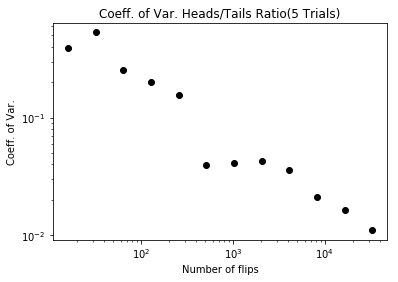

In [92]:
# 変動係数
def CV(X):
    mean = sum(X)/len(X)
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float('nan')

def flipPlot2(minExp, maxExp, numTrials):
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    ratiosCVs, diffsCVs, xAxis = [], [], []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [], []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
    numTrialsString = '(' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips',\
            'Mean Heands/Tails', 'ko', logX = True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of flips',\
            'Standard Deviation', 'ko', logX = True, logY = True)
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsMeans, title, 'Number of flips',\
            'Mean abs(#Heads - #Tails)', 'ko', logX = True, logY = True)
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title, 'Number of flips',\
            'Standard Deviation', 'ko', logX = True, logY = True)
    title = 'Coeff. of Var. abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsCVs, title, 'Number of flips',\
            'Coeff. of Var.', 'ko', logX = True)
    title = 'Coeff. of Var. Heads/Tails Ratio' + numTrialsString
    makePlot(xAxis, ratiosCVs, title, 'Number of flips',\
            'Coeff. of Var.', 'ko', logX = True, logY = True)

flipPlot2(4,15,5)    

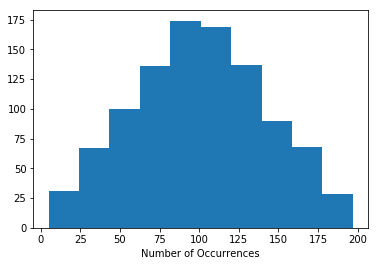

In [99]:
vals = []
for i in range(1000):
    num1 = random.choice(range(0, 101))
    num2 = random.choice(range(0, 101))
    vals.append(num1 + num2)
pylab.clf()
pylab.hist(vals, bins = 10)
pylab.xlabel('Number of Occurrences')
pylab.show()

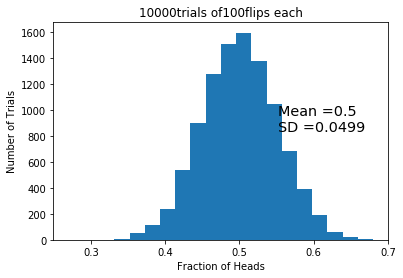

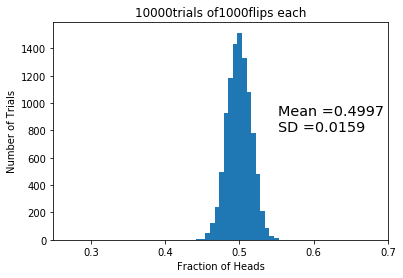

In [108]:
import random

def flip(numFlips):
    heads = 0
    for i in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
    return heads/float(numFlips)

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + 'trials of' \
                + str(numFlips) + 'flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    pylab.annotate('Mean =' + str(round(mean, 4))\
                  + '\nSD =' + str(round(sd, 4)), size='x-large',\
                  xycoords = 'axes fraction', xy = (0.67, 0.5))

def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.clf()
    pylab.hist(val1, bins = 20)
    xmin, xmax = pylab.xlim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 20)
    pylab.xlim(xmin, xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)
    pylab.show()
    
makePlots(100, 1000, 10000)
    